# Decision Tree Classification
"""
This notebook demonstrates how to implement and analyze **Decision Tree Classification** using Python.

### Topics covered:
- Theory of Decision Tree Classification
- Data preprocessing
- Model training and evaluation
- Visualizing the decision tree structure and interpreting results

## Theory of Decision Tree Classification
Decision Tree Classification is a supervised learning algorithm used to predict a categorical target variable
by recursively splitting the dataset based on feature values. The tree structure is comprised of:

- **Root Node**: Represents the entire dataset and serves as the starting point of the tree.
- **Internal Nodes**: Represent decision points where data is split based on specific feature conditions.
- **Leaf Nodes**: Represent subsets of data associated with a specific class label.

### Key Features:
- Decision trees can handle both numerical and categorical features.
- They are interpretable and allow for visualization of the decision-making process.
- Overfitting can occur if the tree is too deep, so pruning or limiting tree depth is often necessary.

### Splitting Criteria
At each split, the algorithm selects the feature and threshold that optimize a splitting criterion. Common metrics include:

- **Gini Impurity**:
  $$ Gini = 1 - \sum_{i=1}^{C} p_i^2 $$
  Where \(p_i\) is the proportion of samples belonging to class \(i\), and \(C\) is the number of classes. The Gini Impurity measures how often a randomly chosen sample would be misclassified.

- **Entropy (Information Gain)**:
  $$ Entropy = - \sum_{i=1}^{C} p_i \log_2(p_i) $$
  Information Gain is the reduction in entropy achieved after splitting:
  $$ IG = Entropy_{parent} - \sum_{children} \frac{n_{child}}{n_{parent}} \cdot Entropy_{child} $$

### How It Works:
1. **Recursive Splitting**: The algorithm splits data into subsets by selecting the feature and threshold
   that optimize the chosen splitting criterion (e.g., Gini Impurity or Information Gain).
2. **Tree Growth**: This splitting process continues until a stopping condition is met (e.g., maximum depth,
   minimum samples per leaf, or pure class subsets).
3. **Prediction**: For a given input, the algorithm traverses the tree from the root to a leaf node, and the
   prediction is the class label of the leaf.

### Advantages:
- Easy to interpret and visualize.
- Handles both numerical and categorical data.
- Requires minimal data preprocessing (e.g., no need for feature scaling or encoding).

### Limitations:
- Can overfit the training data if the tree is too complex.
- Sensitive to small changes in the data (prone to high variance).
- May not perform well with imbalanced datasets without proper handling.

"""


# Diabetes Prediciton

# Step 1: Importing Libraries

In [15]:
!pip install pandas numpy matplotlib seaborn scikit-learn

#Step 2: Load and Explore the Dataset
###We will use the diabetes.xls dataset from kaggle.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv('diabetes.xls')  # Replace 'dataset.csv' with your dataset file

# Splitting features and target
X = data.drop(columns=['Outcome'])  # Replace 'Outcome' with your target column
y = data['Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [18]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


#Step 3: Data Preprocessing and Data Normalization
###We'll split the dataset into training and testing sets and scale the features for better performance.

In [19]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Step: 4 Data Visualization
### Pair Plots

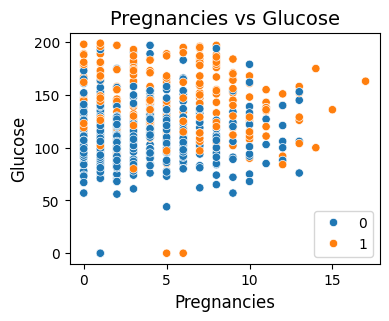

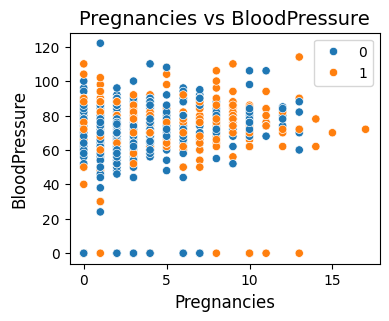

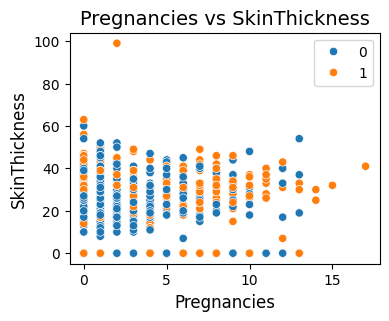

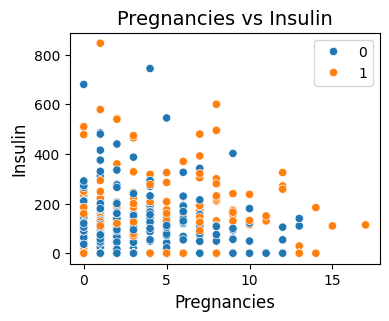

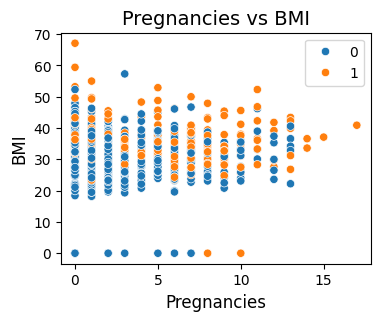

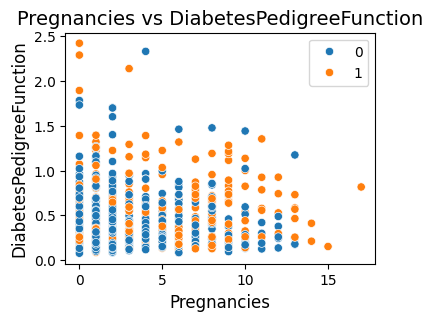

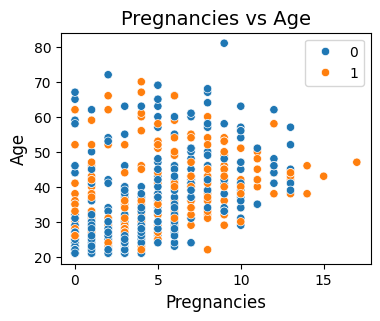

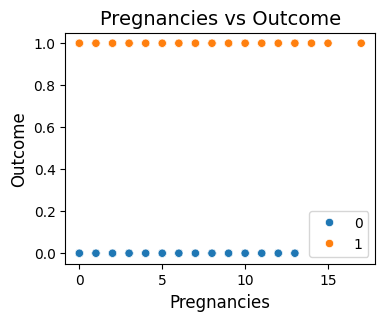

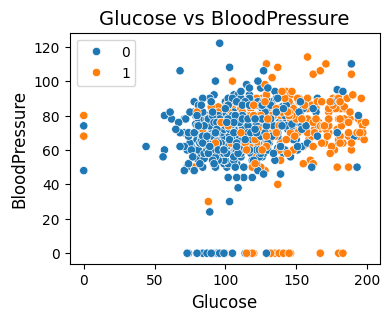

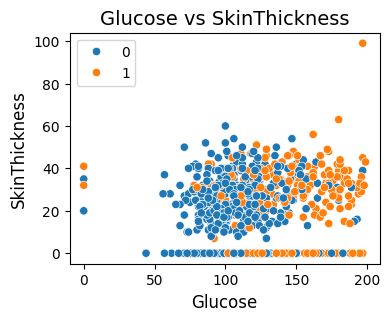

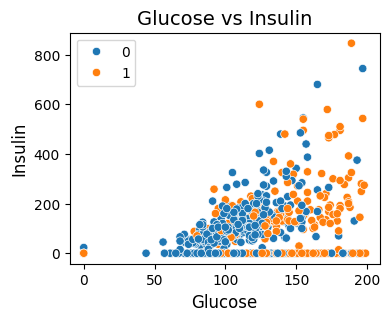

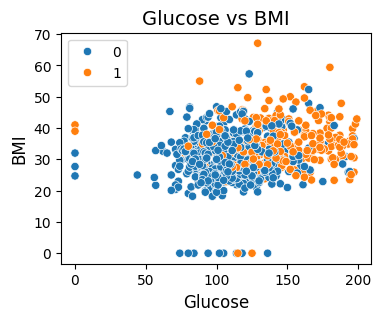

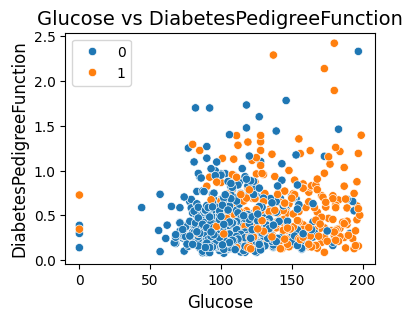

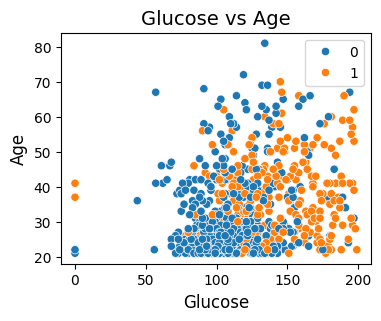

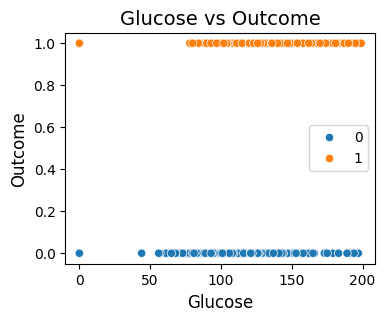

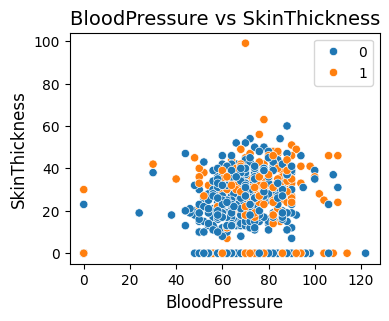

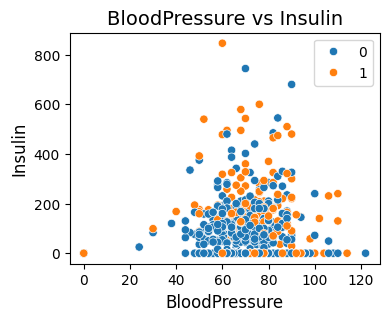

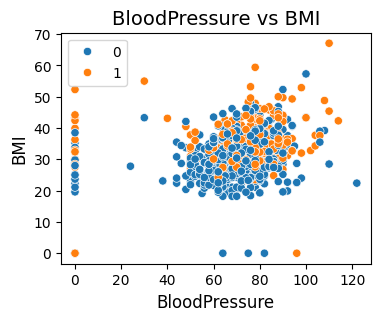

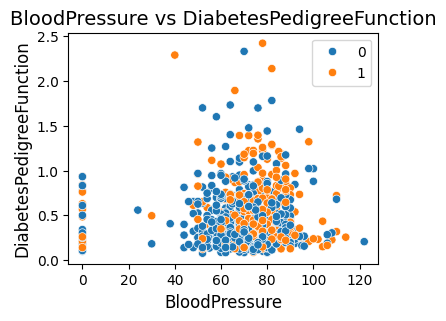

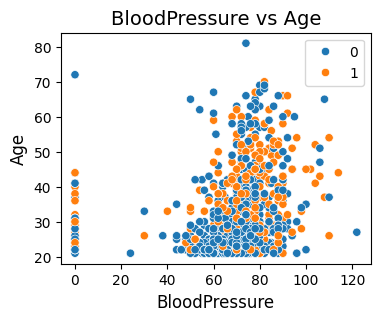

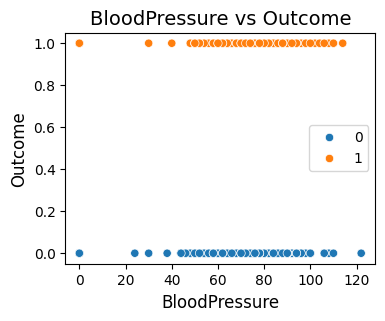

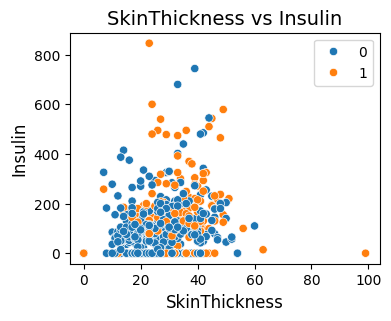

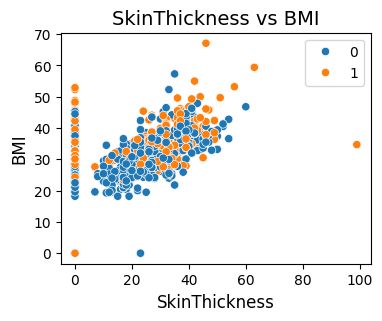

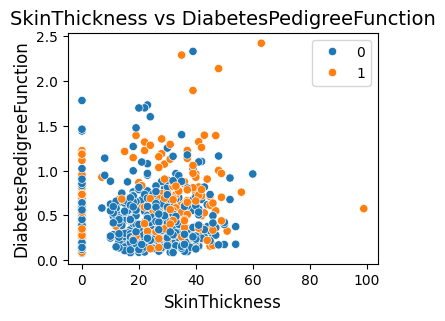

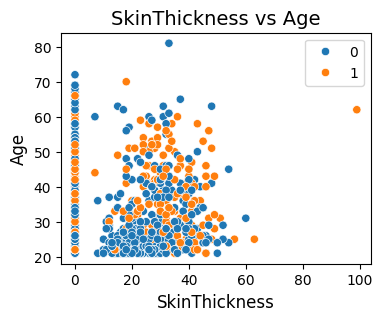

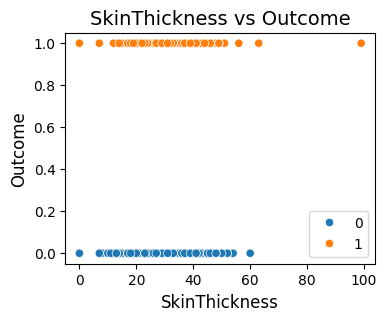

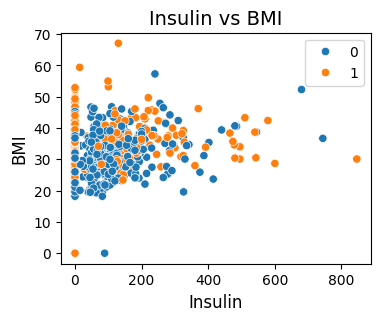

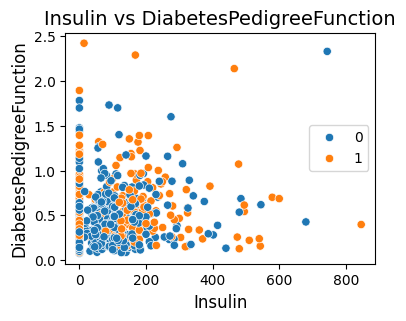

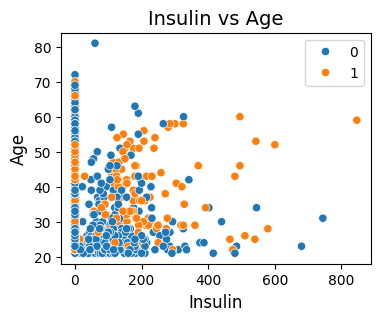

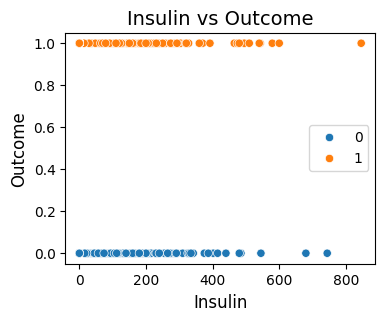

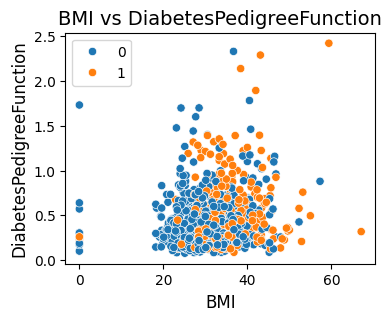

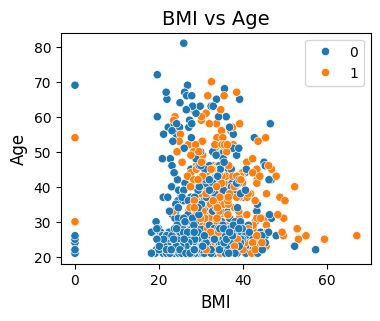

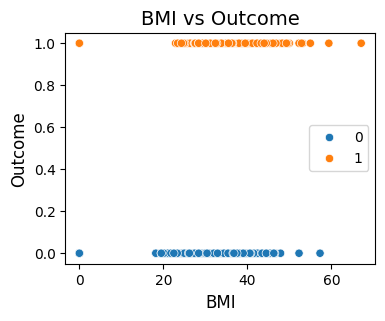

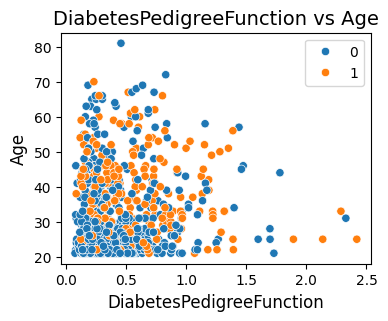

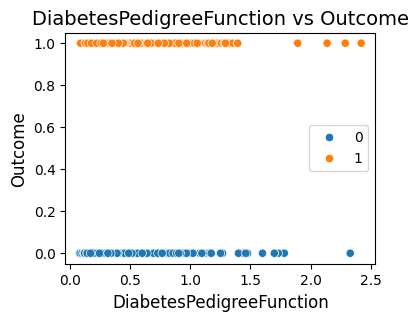

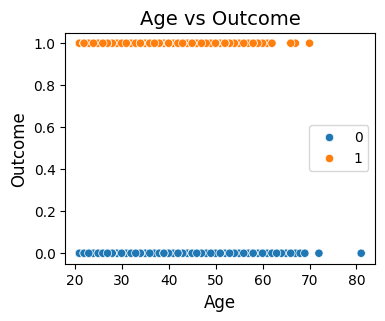

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select pairs of columns (manually or programmatically)
columns = data.columns
pairs = [(columns[i], columns[j]) for i in range(len(columns)) for j in range(i + 1, len(columns))]

# Plot each pair
for x, y in pairs:
    plt.figure(figsize=(4, 3))
    sns.scatterplot(data=data, x=x, y=y, hue='Outcome')
    plt.title(f"{x} vs {y}", fontsize=14)
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    plt.legend(loc='best')
    plt.show()


### heatmap

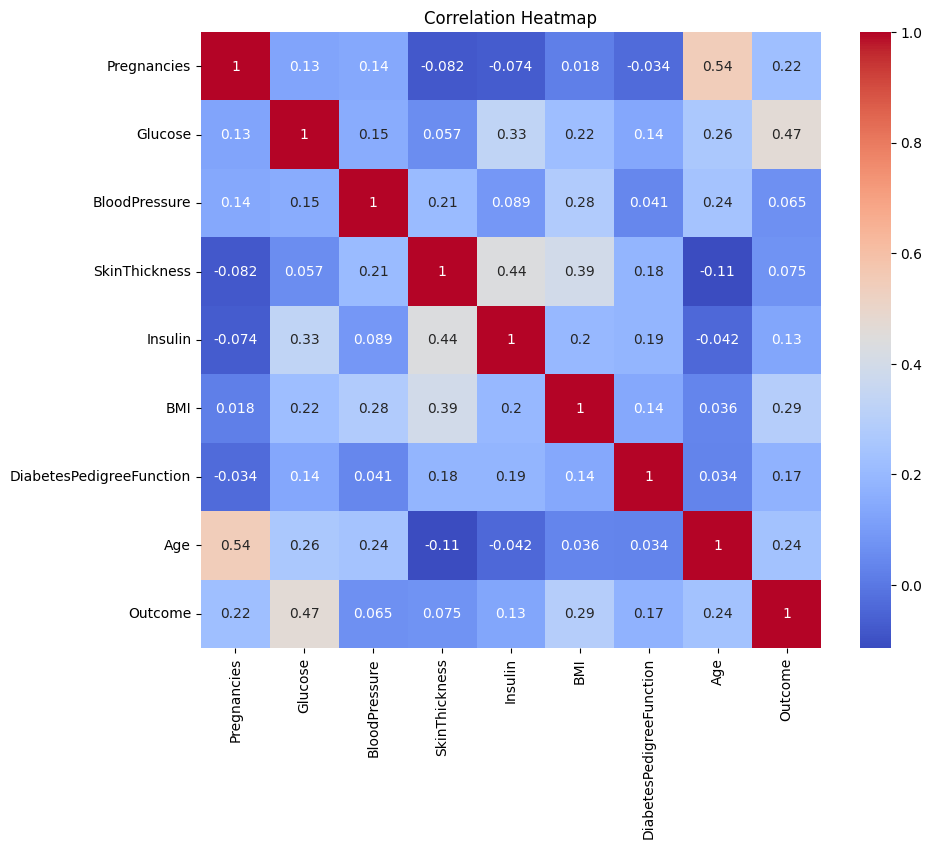

In [21]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#Step: 5 Model Building

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Instantiate and train the model
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = clf.predict(X_test_scaled)


#Step: 5 Model Visualization
### Tree Plot

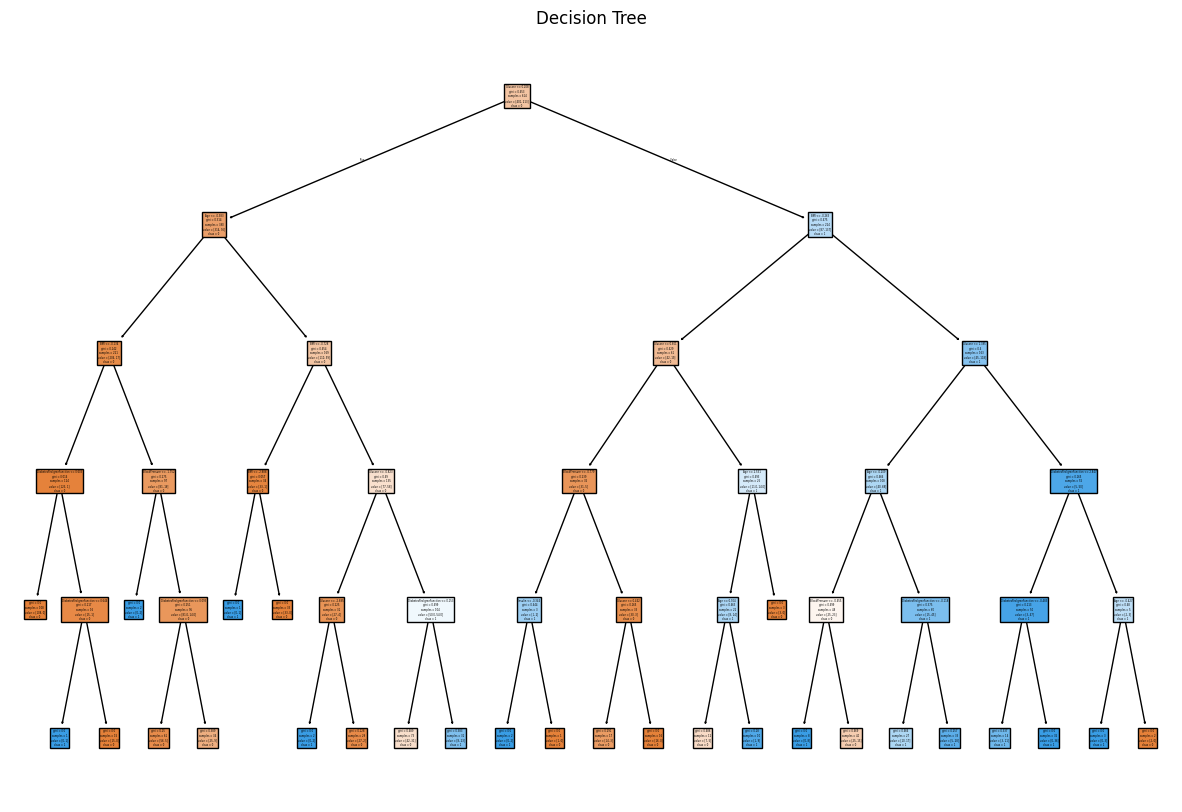

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Convert class names to strings
class_names = list(map(str, clf.classes_))

plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=True)
plt.title("Decision Tree")
plt.show()


#Step: 5 Model Evaluation


In [24]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Accuracy: 0.79
Confusion Matrix:
[[87 12]
 [20 35]]
